**1. matplotlib을 이용하여 한변의 길이가 1인 정삼각형을 그리시오.**

꼭지점의 좌표를 먼저 구해야 합니다. 좌표평면에 다음과 같이 정삼각형을 그립니다. 높이는 $1 \times \sin 60^\circ = {\sqrt{3} \over 2}$입니다.
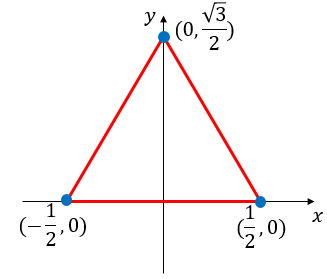
matplotlib으로 그림을 그릴때는 $x$좌표끼리 묶어서 앞에 써주고 $y$좌표끼리 묶어서 뒤에 써줍니다.
점과 점을 선분으로 연결하기 때문에 마지막에 첫번째 등장한 점을 한번 더 써줘야 합니다.

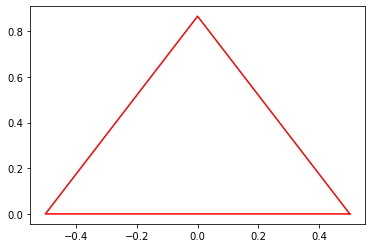

In [1]:
import numpy as np
import matplotlib.pylab as plt

plt.plot([1/2,0,-1/2,1/2],[0,np.sqrt(3)/2,0,0],'r')
plt.show()

**2. matplotlib을 이용하여 반지름이 1인 원을 그리시오.**

원 $x^2+y^2=1$은 함수가 아닙니다. 하나의 $x$에 두개의 $y$값이 대응하죠.
함수로 이해하기 위해 두 반원으로 나눕니다.
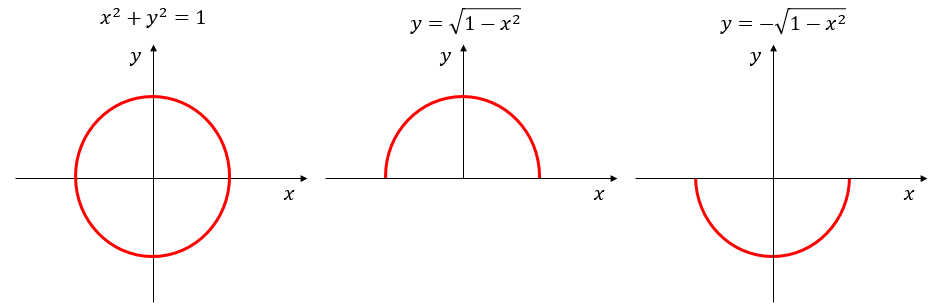
matplotlib은 가로 세로의 비율을 알아서 재조정합니다.
그래서 그냥 출력하면 원이 아니라 타원이 나올꺼에요.
출력화면의 크기를 figsize=(5,5)로 지정하겠습니다.

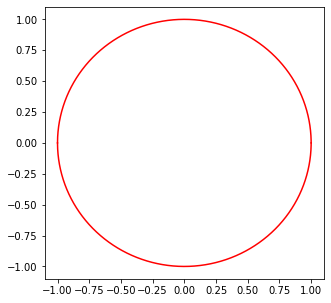

In [2]:
def semicircle(x):
    return np.sqrt(1-x**2)

plt.figure(figsize=(5,5))
X = np.arange(-1.0, 1.0001, 0.0001)
Y = semicircle(X)
plt.plot(X, Y, 'r', X, -Y, 'r')
plt.show()

**3. matplotlib을 이용하여 $x$절편이 $-2,0,1$이고 최고차항의 계수가 1인 삼차함수의 그래프를 그리시오.**

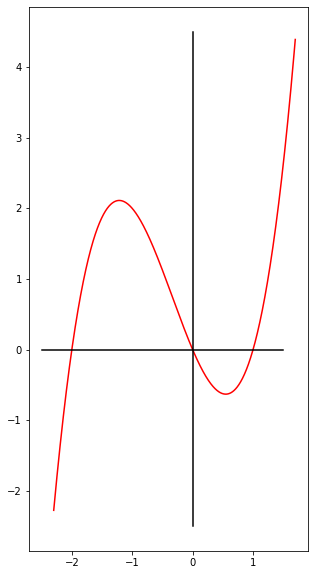

In [3]:
def P(x):
    return (x+2)*x*(x-1)

plt.figure(figsize=(5,10))
X = np.arange(-2.3, 1.7, 0.001)
Y = P(X)
plt.plot(X, Y, 'r')
plt.plot([-2.5,1.5], [0,0], 'k', [0,0], [-2.5,4.5], 'k')
plt.show()

**4. 시그모이드 함수는 등식
$$
y'=y(1-y)
$$
을 만족함을 보이시오.**

$$
y={1 \over 1+e^{-x}} = (1+e^{-x})^{-1}
$$

$$
\begin{aligned}
y'&=-(1+e^{-x})^{-2} (-e^{-x}) \\
&={e^{-x} \over (1+e^{-x})^2} \\
&={(1+e^{-x})-1 \over (1+e^{-x})^2} \\
&={1 \over 1+e^{-x}}-{1 \over (1+e^{-x})^2} \\
&= y-y^2 \\
&= y(1-y)
\end{aligned}
$$
인공신경망이 데이터로부터 학습하는 수학적 원리는 미분입니다. 따라서, 인공신경망이 빨리 학습하려면 미분을 빨리 계산해야만 합니다. 위 식은 미분을 사칙연산만으로 계산할 수 있게 해줍니다.

**5. 1학년 미적분학 시간에 배운 테일러 전개를 시각화 해보자. 함수 $f$에 대하여 다항식
$$
\sum_{k=0}^n {f^{(k)}(0) \over k!} x^k
$$
을 $f$의 $n$차 근사다항식이라 한다. 여기서 $f^{(k)}$는 $f$의 $k$차 도함수이다.**

**(i) $f(x)=\sin x$의 $n$차 근사다항식을 구하시오.**

**(ii) 인터넷으로  numpy의 팩토리얼 함수를 검색하시오.**

**(iii) 반복문을 이용하여 (i)을 코드로 구현하시오.**

**(iv) matplotlib을 이용하여 $f(x)=\sin x$와 근사다항식들의 그래프를 그리시오.**

(i) $\sin x$를 계속 미분해 나가면 다음과 같은 4개의 마디가 반복됩니다. $x=0$을 대입하면 $k$가 짝수일 때는 모두 $0$이고 홀수일때는 $1$과 $-1$이 번갈아 가며 등장합니다.
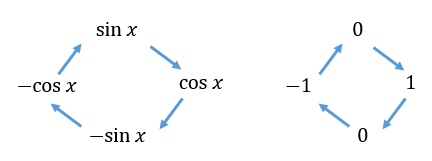
$\sin x$의 $n$차 근사 다항식은
$$
x - {x^3 \over 3!} + {x^5 \over 5!} - {x^7 \over 7!} + {x^9 \over 9!} - {x^{11} \over 11!} + {x^{13} \over 13!} - {x^{15} \over 15!} + \cdots
$$
입니다.

(ii) np.math.factorial

In [3]:
#(iii)
def P(n,x):
    S=0
    for k in range(1,n+1):
        if k%4==1:
            S+=(x**k)/np.math.factorial(k)
        if k%4==3:
            S-=(x**k)/np.math.factorial(k)
    return S

(iv) 1학년 미적분학 시간에 배우는 근사다항식을 matplotlib을 이용해 시각화해봤습니다. 다항함수의 차수가 커지면서 $\sin x$를 근사하는 영역이 점점 더 넓어집니다.

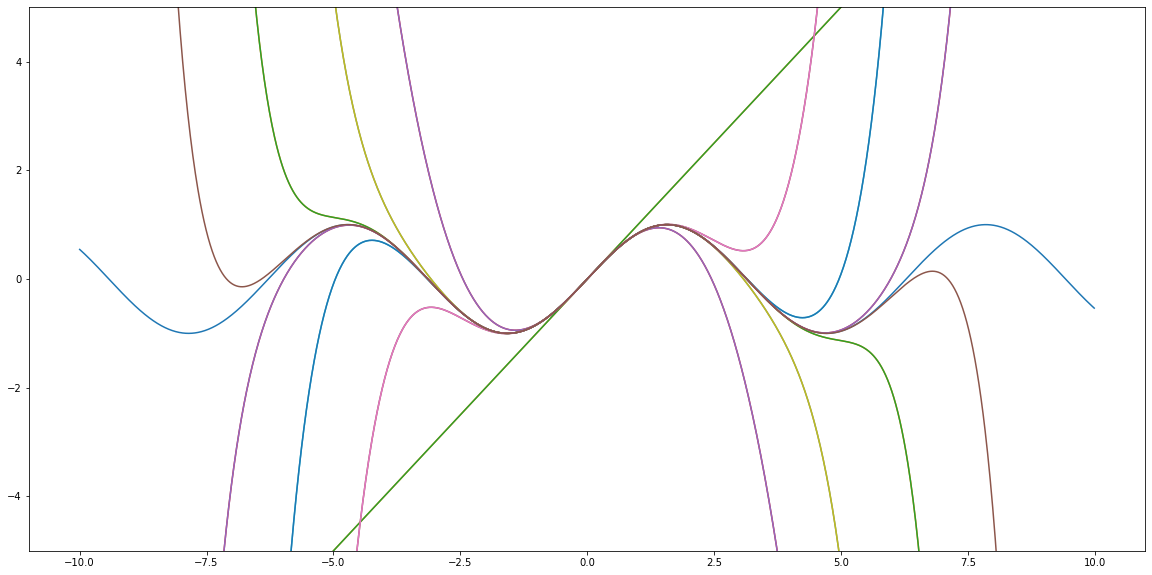

In [4]:
plt.figure(figsize=(20,10))

X=np.arange(-10,10,0.01)
Y=np.sin(X)
plt.plot(X,Y)

n=15
for i in range(1,n+1):
    plt.plot(X,P(i,X))
plt.ylim(-5,5)
plt.show()